# Edge Detection

An edge is an intensity discontinuity. At an edge, the first derivative is high.

For a 2D function f(x,y) the partial derivative is:
$$\lim_{\epsilon \to 0}\frac{\partial f}{\partial x} = \frac{f(x+1,y) - f(x,y)}{\epsilon}$$
When we discretize this, we get:
$$\frac{\partial f}{\partial x} = f(x+1,y) - f(x,y)$$
But this is not symmetric. We can use the central difference:
$$\lim_{\epsilon \to 0}\frac{\partial f}{\partial x} = \frac{f(x+1,y) - f(x-1,y)}{2\epsilon}$$
When we discretize this, we get:
$$\frac{\partial f}{\partial x} = \frac{f(x+1,y) - f(x-1,y)}{2}$$

The Sobel kernel additionally smoothes the image. This is because the Sobel kernel is a derivative kernel. Derivatives are sensitive to noise. Smoothing the image before applying the Sobel kernel reduces the noise.

The Prewitt kernels are:
$$ \begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}  $$
and
$$ \begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}  $$

These are used to maximally detect edges. Sobel kernels additionally perform smoothing.

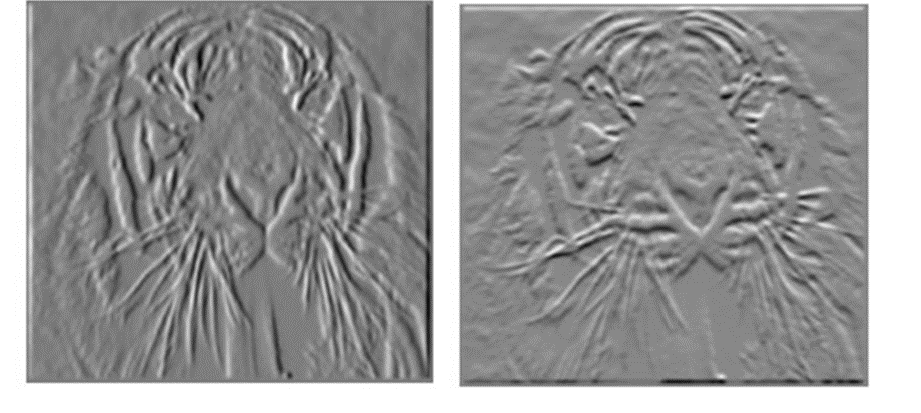

As shown above, the 2 kernels are applied. The one on the left has all vertical edges and hence is the result of getting the derivative horizontally. The one on the right has all horizontal edges and hence is the result of getting the derivative vertically.

### Gradient of an image

The gradient of an image is given by:
$$\nabla f = \left[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right]$$

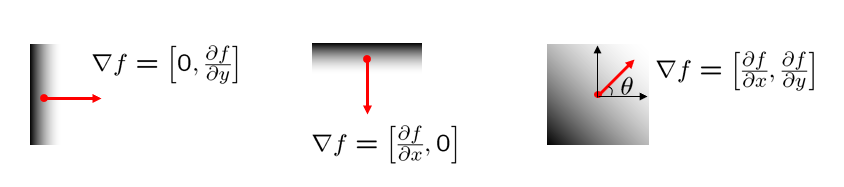

All gradient kernels must sum to 0. This is because in the same colour region, the gradient is 0. The sum of the gradients in the same colour region must be 0. This is why the Sobel and Prewitt kernels sum to 0.

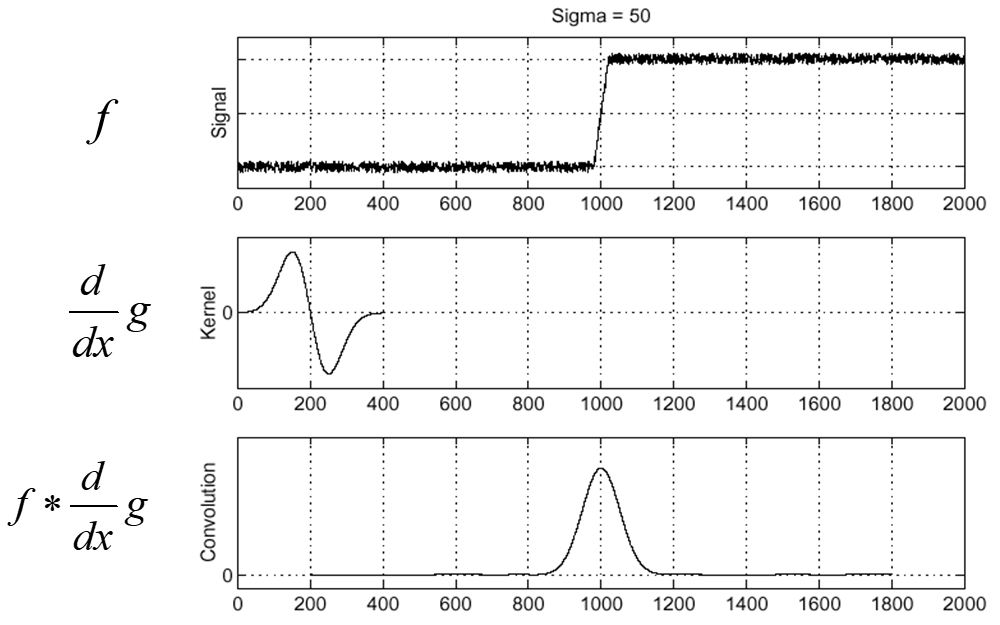

In the image above, g is a smoothing kernel. After smoothing, there is a peak in the derivative which corresponds to an edge.

Differentiation is a convolution operation. Therefore, we can intergate the 2 convolutions and still get the same result.

$$\frac{d}{dx}(f*g) = f * \frac{d}{dx}g$$

Complexity of the left hand side is $O(n^2*m^2)$ where n is the image size and m is the kernel size. This is because convolving f and g is $O(n^2m^2)$ and this result is convolved with the derivative kernel which again is $O(n^2m^2)$. Total operations is $n^2m^2 + n^2m^2$ which is $O(n^2m^2)$.

Complexity of the right hand side is $O(n^2m^2)$ where n is the image size and m is the kernel size. This is because the derivative kernel is requires $O(m^4)$ operations and the convolution after that requires $O(n^2m^2)$ operations. Total operations is $m^4 + n^2m^2$ which is $O(n^2m^2)$.

Although the complexities are the same, because the convolution with the larger image is applied only once

Smoothed derivatives removes noise but blurs images.
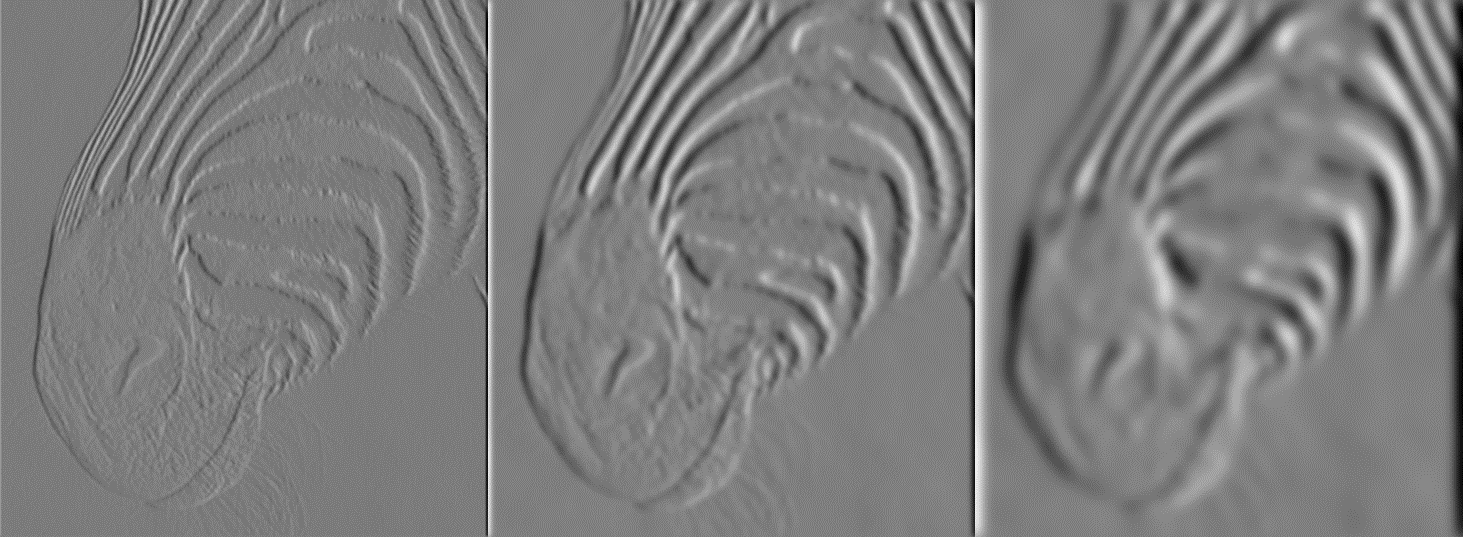

### Canny edge detection

The steps in Canny edge detection are:
1. Apply Gaussian filter to smooth the image and remove noise.
2. Compute the gradient magnitude and direction.
3. Apply non-maximum suppression to thin the edges. This is done by keeping only the local maxima in the gradient direction.
4. Apply hysteresis thresholding to detect edges. This is done by keeping only the edges that are above a high threshold and connected to edges above a low threshold. Find a strong edge and then follow the edge in the direction of the gradient. If the edge is above the low threshold, keep it. If it is below the low threshold, discard it. If any edges are weak and in isolation, discard them.

Before applying Canny edge detection

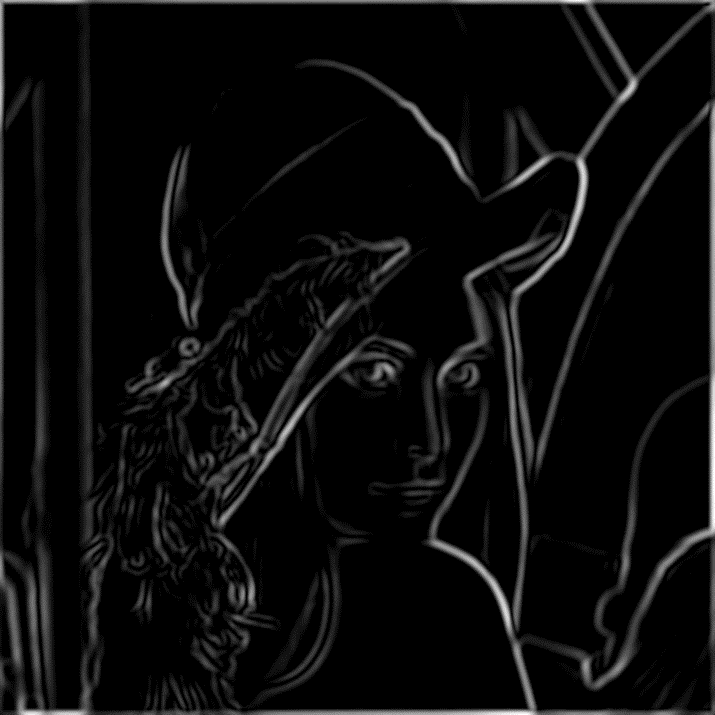

After applying Canny edge detection

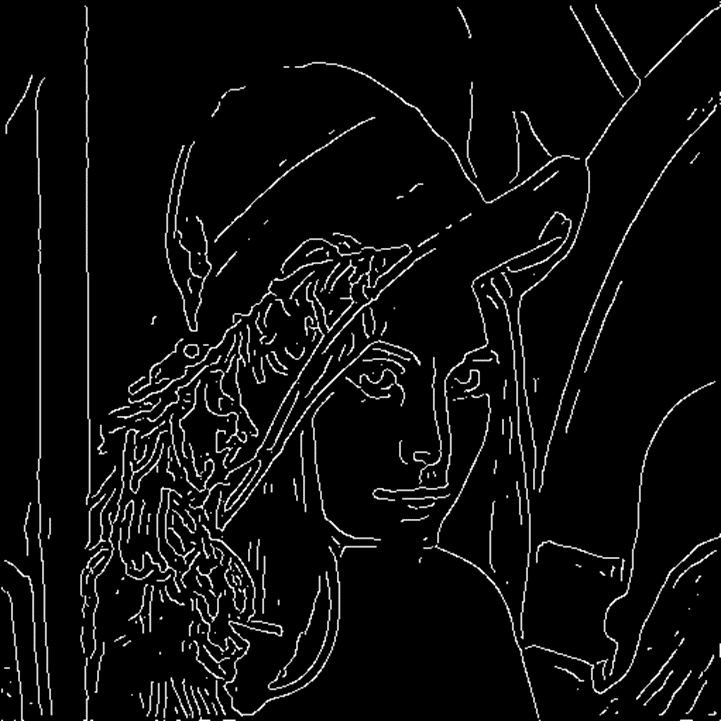

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import math

image_dir = Path('images')

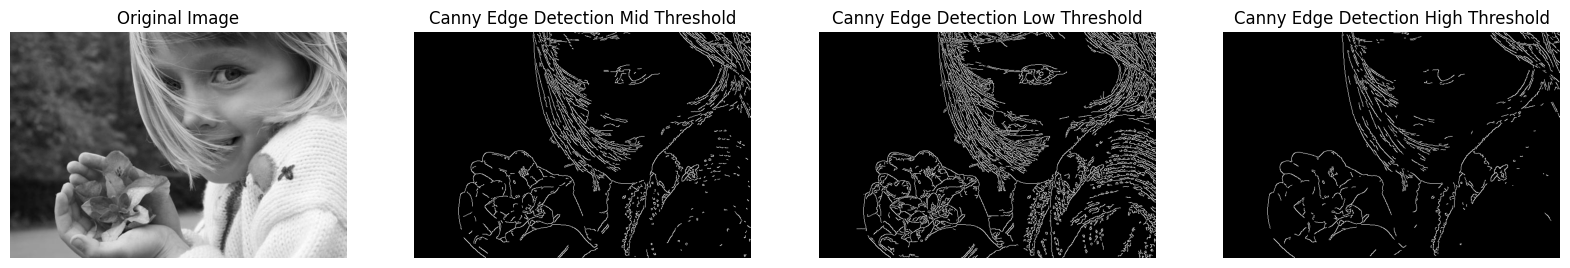

In [4]:
image = cv2.imread(str(image_dir/"girl.jpg"), cv2.IMREAD_GRAYSCALE)
canny1 = cv2.Canny(image, 100, 150)
canny2 = cv2.Canny(image, 50, 100)
canny3 = cv2.Canny(image, 150, 200)
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(image, cmap = 'gray')
ax[0].axis("off")
ax[0].set_title("Original Image")
ax[1].imshow(canny1, cmap = 'gray')
ax[1].axis("off")
ax[1].set_title("Canny Edge Detection Mid Threshold")
ax[2].imshow(canny2, cmap = 'gray')
ax[2].axis("off")
ax[2].set_title("Canny Edge Detection Low Threshold")
ax[3].imshow(canny3, cmap = 'gray')
ax[3].axis("off")
ax[3].set_title("Canny Edge Detection High Threshold")
plt.show()

The following code is an interactive demo of Canny edge detection.

In [9]:
hi_threshold_max = 255
title_window = 'Canny: Low and High Thresholds'

ratio = 0.3  # Low threshold/Hi threshold
hi_threshold = 255
low_threshold = math.floor(hi_threshold * ratio)

trackbar1_name = 'High Threshold Value'
trackbar2_name = 'Low Threshold %'

def on_trackbar(val):
    hi_threshold = cv2.getTrackbarPos(trackbar1_name, title_window)
    ratio = cv2.getTrackbarPos(trackbar2_name, title_window) / 100.0
    low_threshold = int(hi_threshold * ratio)
    edges = cv2.Canny(im, low_threshold, hi_threshold)
    cv2.imshow(title_window, edges)

im = cv2.imread('images/girl.jpg', cv2.IMREAD_COLOR)
if im is None:
    print('Could not open or find the image.')
    exit(0)

cv2.namedWindow(title_window)
cv2.createTrackbar(trackbar1_name, title_window, hi_threshold, hi_threshold_max, on_trackbar)
cv2.createTrackbar(trackbar2_name, title_window, int(ratio * 100), 100, on_trackbar)
on_trackbar(0)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


# Corner Detection

How is a corner defined? A corner is a point where the intensity of the image changes in more than one direction. For an edge, it happens only in 1 direction and for an inner point it doesn't change much. In other words, a corner is a point where the gradient of the image has a high magnitude.

Corner detection can be used to stitch images together. If we have 2 images and we want to stitch them together, we can find the corners in both images and then find the corners that are common to both images. These common corners can be used to stitch the images together. They can be used for image alignment, 3D reconstruction, object recognition, etc.

Corners are features of an image. Such features would need to be:
1. Repeatable: The same feature should be detected in different images.
2. Distinctive: The feature should be different from other features.
3. Locality: The feature should be local to a region.
4. Compactness: The feature should be compact compared to the image

Basic idea of corner detecion: A corner is a point where the intensity changes in more than one direction. This can be detected by looking at the gradient of the image.


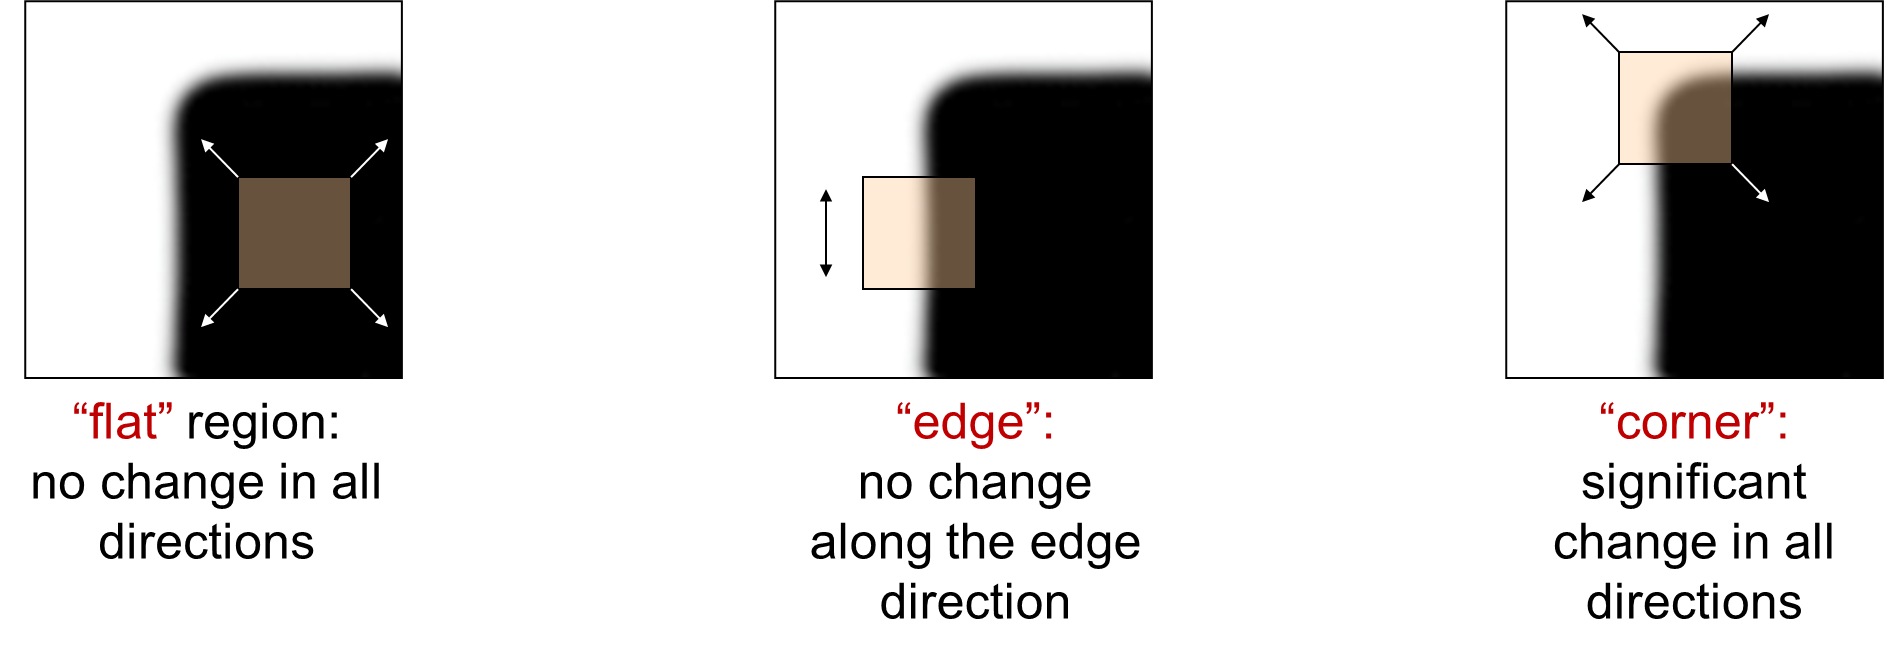

Consider the image shown below: We consider a window to detect corners. The gradient is given by:

$$\nabla f = \left[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right]$$

We plot the magnitude on the left. For a discrete system, it can be given by:

$$E(u,v) = \sum_{x,y}[I(x+u,y+v) - I(x,y)]^2$$

where w(x,y) is a window function. This is the sum of squared differences. A smaller window is more sensitive to noise and a larger window is less sensitive to noise. However, large windows may miss small changes

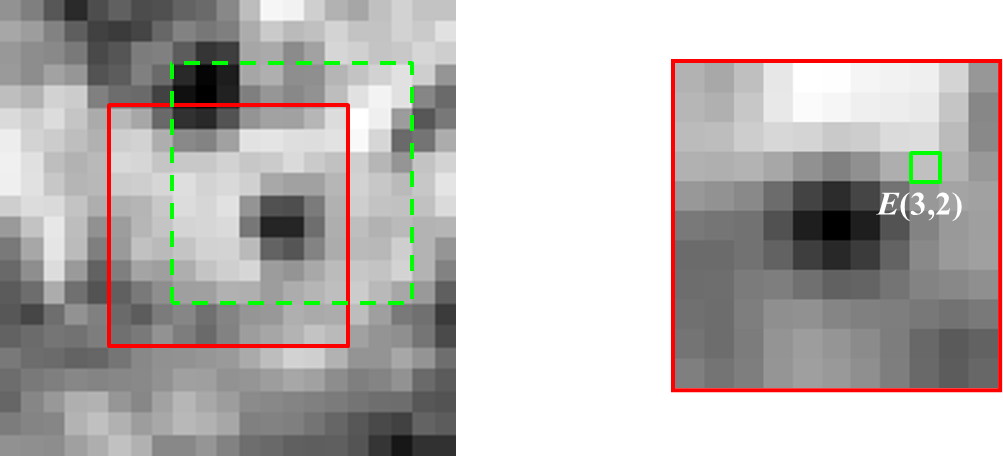

We can calculate the gradient using the Taylor series expansion:

$$I(x+u,y+v) = I(x,y) + uI_x + vI_y$$

Substituting this in the equation above, we get:

$$E(u,v) = \sum_{x,y}[uI_x + vI_y]^2$$

We can seperate the terms into matrices as:

$$E(u,v) = \begin{bmatrix} u & v \end{bmatrix} \begin{bmatrix} I_x^2 & I_xI_y \\ I_xI_y & I_y^2 \end{bmatrix} \begin{bmatrix} u \\ v \end{bmatrix}$$

This matrix is called the second moment matrix.

Consider a horizontal or vertical edge: The gradient is in only one direction. The second moment matrix is:

$$\begin{bmatrix} I_x^2 & I_xI_y \\ I_xI_y & I_y^2 \end{bmatrix} = \begin{bmatrix} I_x^2 & 0 \\ 0 & I_y^2\end{bmatrix}$$

of which one of $I_x^2$ or $I_y^2$ is 0. The determinant of this matrix is 0. This means that the edge is not a corner.

Consider a corner: The gradient is in 2 directions. The second moment matrix is:

$$\begin{bmatrix} I_x^2 & I_xI_y \\ I_xI_y & I_y^2 \end{bmatrix}$$

Diagonaling this matrix, we get:

$$\begin{bmatrix} I_x^2 & I_xI_y \\ I_xI_y & I_y^2 \end{bmatrix} = R^{-1}\begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2\end{bmatrix}\ R$$

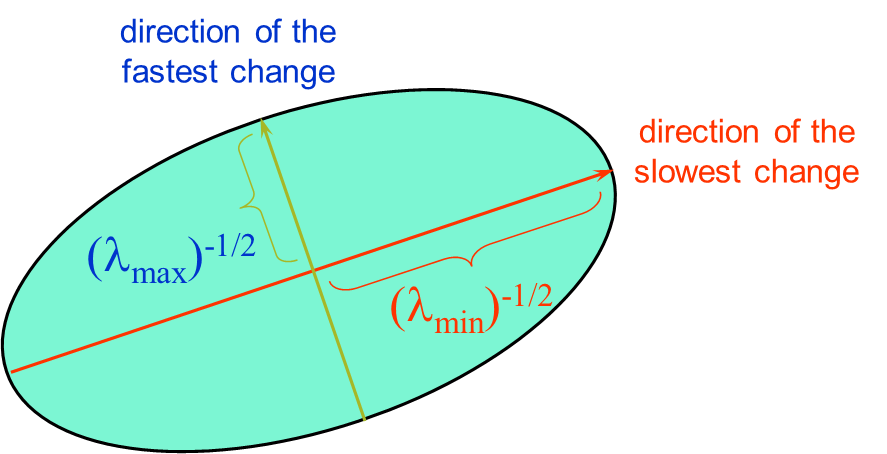

At a corner, the eigenvalues are large and of similar magnitude. At an edge, one of the eigenvalues is 0. At a flat region, both eigenvalues are small.

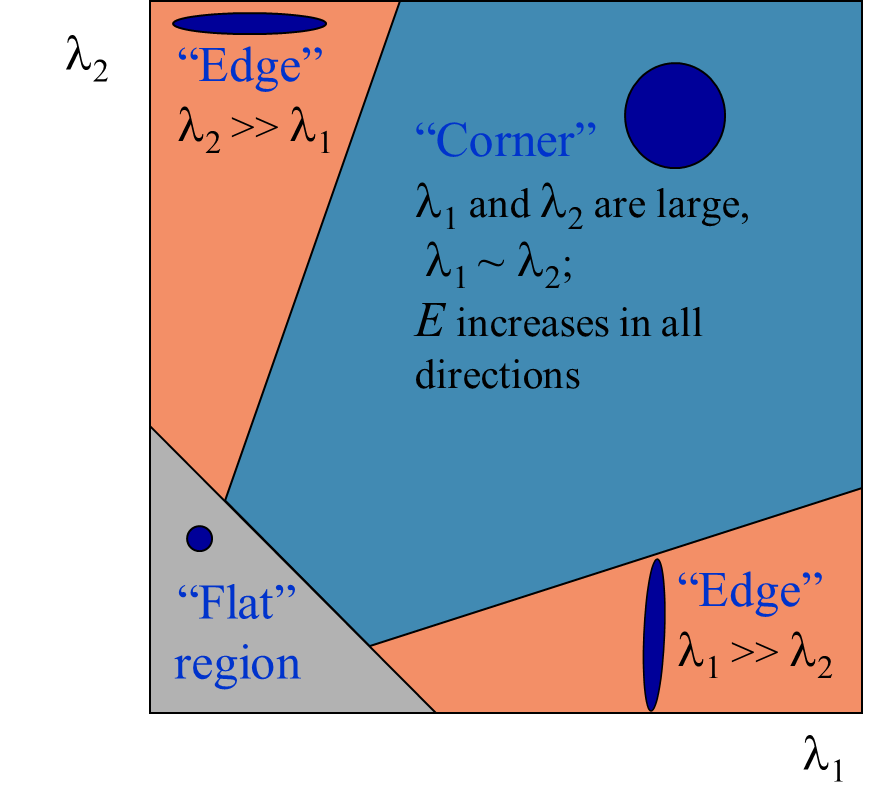

$$R = \text{det}(M) - k \cdot (\text{trace}(M))^2$$
where $(\text{det}(M) = \lambda_1\lambda_2)$ and $(\text{trace}(M) = \lambda_1 + \lambda_2$

### Harris corner detector

The Harris corner detector is a corner detection algorithm that is more robust to noise. The Harris corner detector uses the second moment matrix to detect corners. The Harris corner detector is given by:

Steps:
1. Compute partial derivatives at each pixel
2. Compute the second moment matrix
3. Compute the corner response function
4. Threshold the corner response function
5. Non-maximum suppression

Corner detection should have invariance and covariance. Invariance is the property of the feature that remains the same under transformations. Covariance is if we have 2 transformed images, the features should be the same.

Harris corner detection is covariant to image translation and rotation. It is partially invariant to affine changes as the threshold may be the same. It is not covariant to scaling as the window size would be the same. We can obtain similar results by resizing the window.

### Blob detection

Blob detection is the detection of regions in an image that have a similar intensity compared to the neighbouring regions. Blobs are regions in an image that have a similar intensity. Blobs are used in image segmentation, object recognition, etc.

To perform blob detection, we convolve the image with different scales of hte blob filterand look for extrema in the response. The Laplacian of Gaussian (LoG) is used as the blob filter. The LoG is given by:

$$LoG(x,y) = \nabla^2g(x,y) = \frac{\partial^2g}{\partial x^2} + \frac{\partial^2g}{\partial y^2}$$

The LoG is a second derivative filter. Using the center difference formula, we obtain:

$$\frac{\partial^2g(x,y)}{\partial x} = \frac{\frac{\partial g(x+1,y)}{\partial x} - \frac{\partial g(x-1,y)}{\partial x}}{2}$$

$$= \frac{\frac{g(x+2,y) - g(x,y)}{2} - \frac{g(x,y) - g(x-2,y)}{2}}{2}$$

$$= \frac{g(x+2,y) - 2g(x,y) + g(x-2,y)}{4}$$

This can be directly obtained as:

$$\frac{\partial^2g(x,y)}{\partial x^2} = g(x+1,y) - 2g(x,y) + g(x-1,y)$$

Similarly, we can obtain:

$$\frac{\partial^2g(x,y)}{\partial y^2} = g(x,y+1) - 2g(x,y) + g(x,y-1)$$

Therefore, the LoG is given by:

$$LoG(x,y) = g(x+1,y) + g(x-1,y) + g(x,y+1) + g(x,y-1) - 4g(x,y)$$

As a kernel, this can be represented as:

$$\begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}$$

Since all terms sum to 0, this is a derivative kernal.

To keep it scale invariant, we use the scale-normalized LoG. The scale-normalized LoG is given by:

$$LoG(x,y) = \sigma^2\nabla^2g(x,y) = \sigma^2\left(\frac{\partial^2g}{\partial x^2} + \frac{\partial^2g}{\partial y^2}\right)$$

Increasing the scale of the LoG increases the size of the blob and blurs the image.

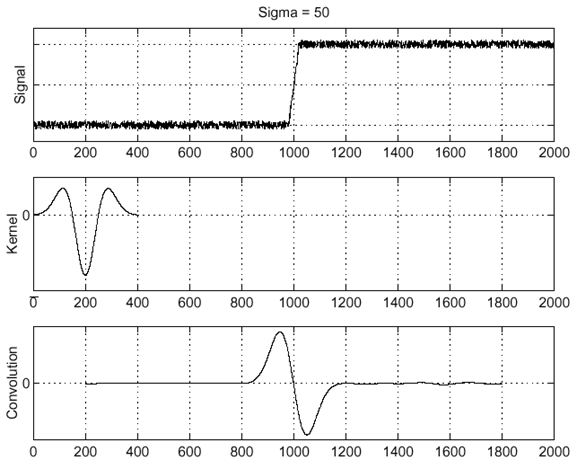

The above is another way of edge detection where an edge is detected when the second derivative is 0. An edge is a ripple while a blob is the superposition of 2 ripples. Such superpositions need to be obtained by resizing the blob filter.

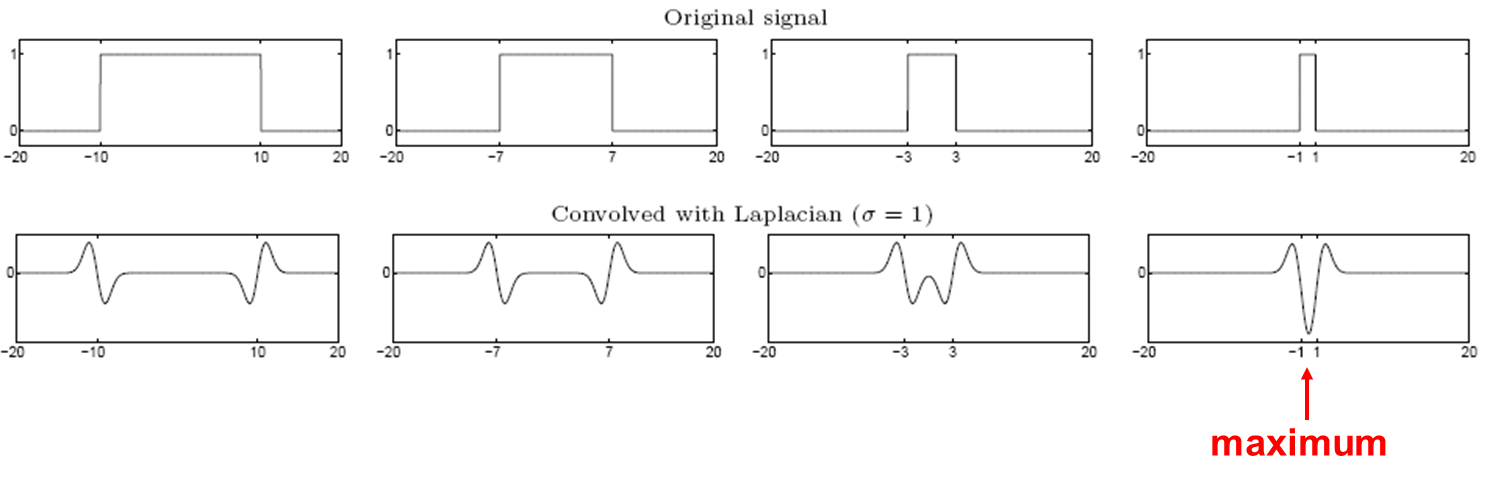

The maximum is obtained at the center of the blob. For this, the scale of the blob should match that of the filter as shown below:

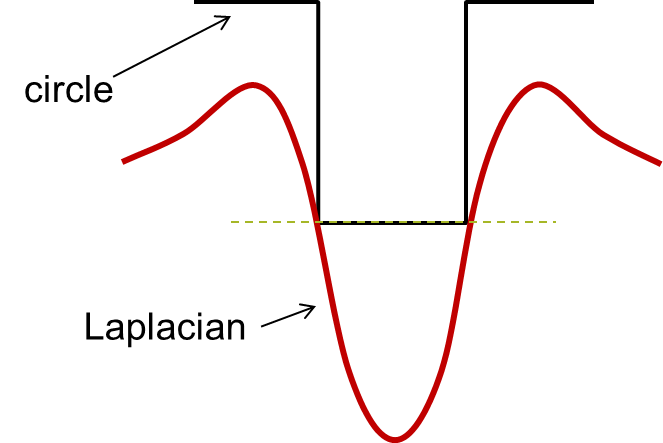

In the below code, we obtain 2D Gaussians and differentiate them twice and add them to get the LoG filter. We then convolve the image with the LoG filter to detect blobs.

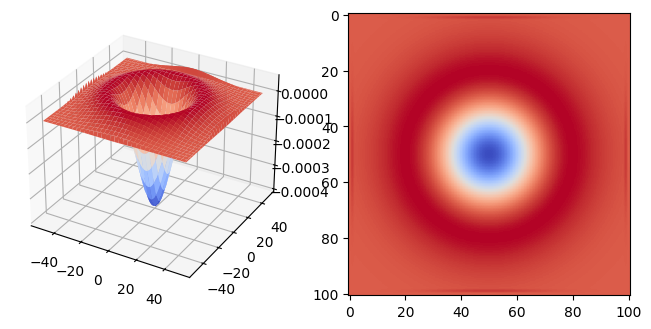

In [11]:
sigma = 15
half_width = 50 # kerenl of size 100
# half width is 3*sigma as a rule of thumb.
# if too low, it doesn;t go to 0
# if too high, it is too narrow
x = np.linspace(start = -half_width, stop = half_width, num = 2*half_width+1)
y = np.linspace(start = -half_width, stop = half_width, num = 2*half_width+1)
# print(x)
# print(y)
X, Y = np.meshgrid(x, y)
# print(X)
# print(Y)

G = 1/(2*np.pi*sigma**2)*np.exp(-(X**2 + Y**2)/2/sigma**2) # 2D Gaussian
G = G/np.sum(G) # Normalizing the kernel
Gx = cv2.Sobel(G, cv2.CV_64F, 1, 0, ksize=3) # Derivative in x
Gy = cv2.Sobel(G, cv2.CV_64F, 0, 1, ksize=3) # Derivative in y

Gxx = cv2.Sobel(Gx, cv2.CV_64F, 1, 0, ksize=3) # Second derivative in x
Gyy = cv2.Sobel(Gy, cv2.CV_64F, 0, 1, ksize=3) # Second derivative in y

L = Gxx + Gyy # Laplacian
# print(G)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, L, cmap = 'coolwarm')
ax = fig.add_subplot(122)
ax.imshow(L, cmap = 'coolwarm')
plt.show()

More robust: SIFT

Here, we also consider orientation. This is done by calculating the gradient in each direction and then plotting on a histogram.

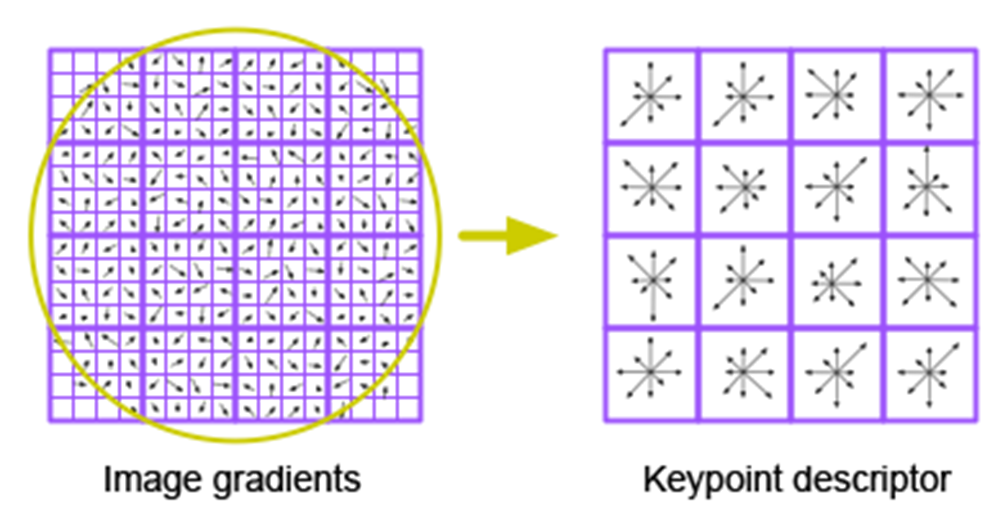

As shown above, in the wondow, we obtain the overall drection of the gradient. This makes it more robust to rotation.

A more efficient way of implementation:

1. The image is convolved with Gaussian filters at different scales (different values of $\sigma$). Each scale represents a level of detail in the image, with larger $\sigma$ values corresponding to more blurred (smoothed) versions of the image.

2.  For each adjacent pair of scales, the blurred images are subtracted from each other to form a Difference of Gaussians image. (Laplacian is essentially the second derivative of the Gaussian, and subtracting two closely spaced Gaussians simulates this second derivative.)